Wyświetlenie zawartości pliku CSV

In [19]:
import pandas as pd

df = pd.read_csv('bots_vs_users.csv')
df.head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


Informacje o zbiorze danych

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

Czyszczenie danych (usunięcie kolumn z brakującymi danymi i zastąpienie wartości 'Unknown' i 'NaN' przez -1)

In [21]:
df.dropna(axis=1, how='all', inplace=True)
df.fillna(-1, inplace=True)
df.replace('Unknown', -1, inplace=True)

Zmiana zmiennej city - od tej pory -1 symbolizuje brak miasta a 1 miasto. Zmieniam również nazwę kolumny na bardziej adekwatną

In [22]:
df['city'] = df['city'].apply(lambda x: 1 if x != -1 else -1)
df = df.rename(columns={'city': 'has_city'})

Zamiana zmiennych nienumerycznych na numeryczne

In [23]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

Informacje o zbiorze po czyszczeniu

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   float64
 1   has_birth_date              5874 non-null   float64
 2   has_photo                   5874 non-null   float64
 3   can_post_on_wall            5874 non-null   float64
 4   can_send_message            5874 non-null   float64
 5   has_website                 5874 non-null   float64
 6   gender                      5874 non-null   float64
 7   has_short_name              5874 non-null   float64
 8   has_first_name              5874 non-null   float64
 9   has_last_name               5874 non-null   float64
 10  access_to_closed_profile    5874 non-null   float64
 11  is_profile_closed           5874 non-null   float64
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

Statystyki opisowe

In [25]:
df.describe()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,has_city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
count,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,...,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.00000,5874.000000,5874.000000
mean,0.991828,0.708546,0.546136,0.034559,0.438713,-0.007831,1.208716,0.991828,0.991828,0.990807,...,-0.762562,146.964792,14.944181,-0.763059,-0.605005,0.053456,-0.190671,-0.34525,-0.442629,-0.704460
std,0.127590,0.705725,0.506050,0.203822,0.504439,0.494761,0.447882,0.127590,0.127590,0.131465,...,0.426597,830.598234,80.643751,0.425425,0.717927,0.998655,0.981738,0.85226,0.743113,0.709804
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.00000,-1.000000,-1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.75000,0.000000,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.950000,41415.700000,2866.590000,0.300000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Korelacja między zmiennymi. Czym większa liczba tym silniejszy związek z tym, że dany użytkownik jest człowiekiem a czym mniejsza tym silniejszy związek z tym, że dany użytkownik jest botem.

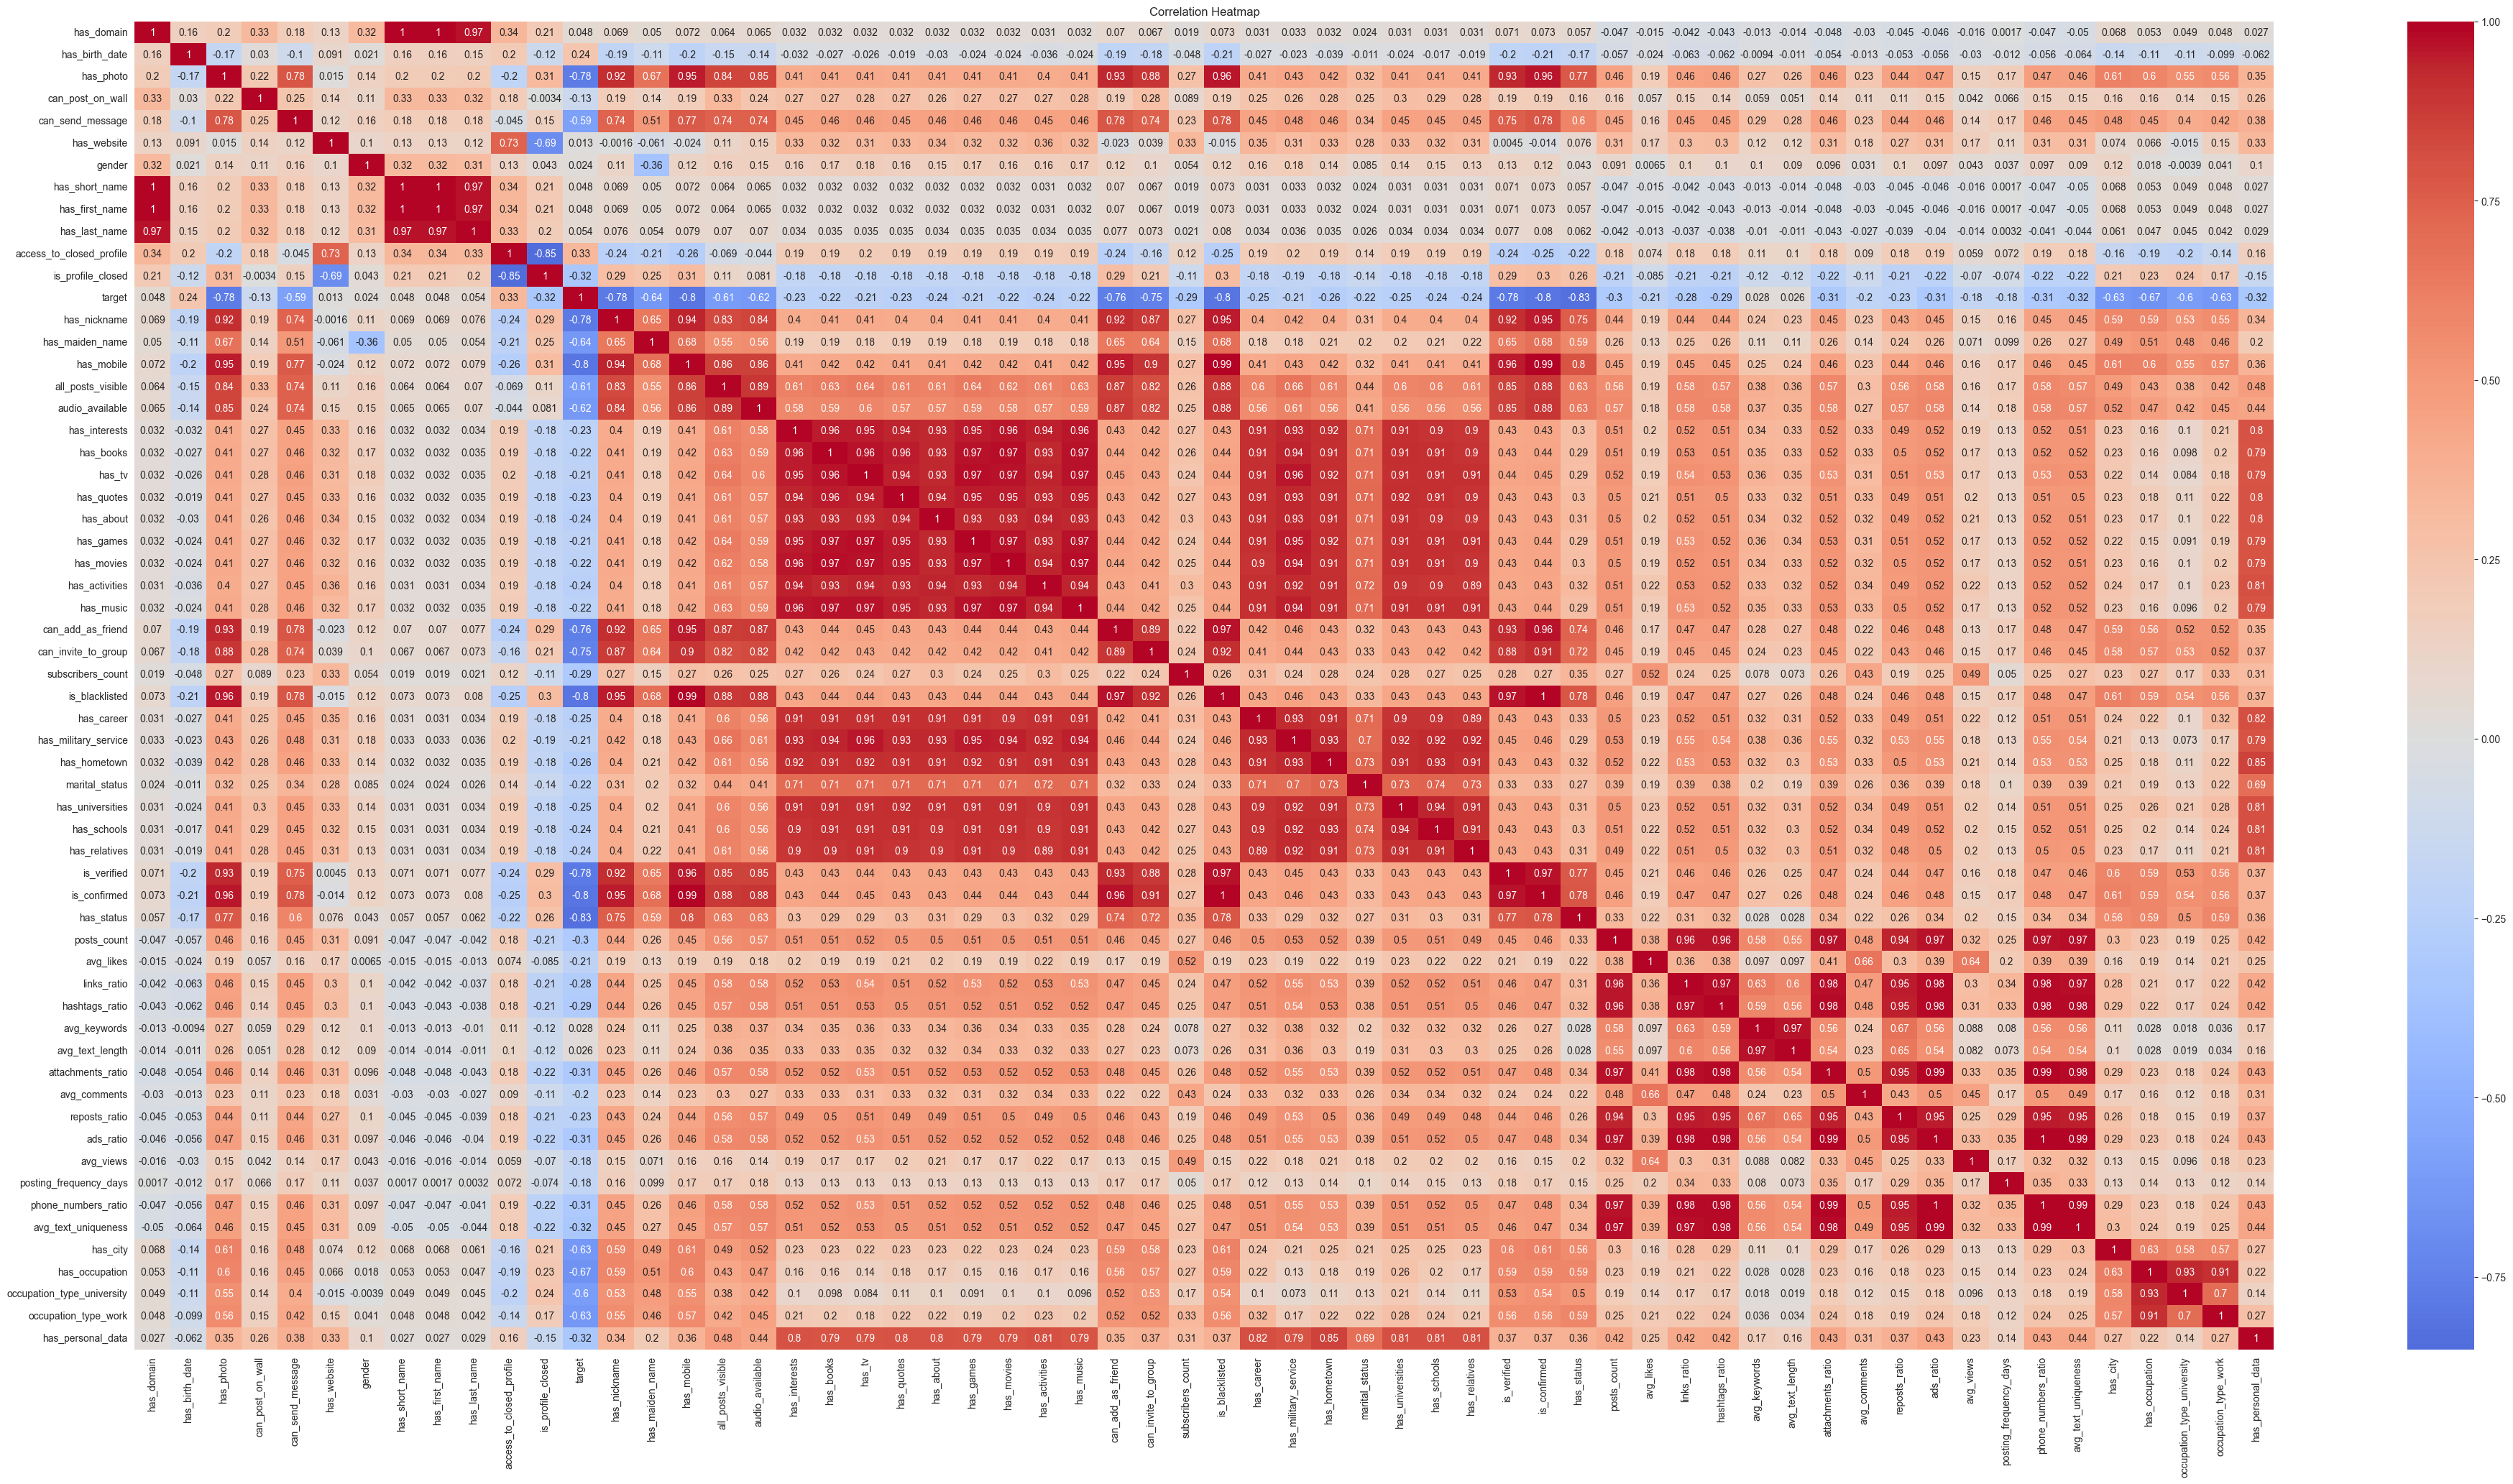

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_cols].corr()
plt.figure(figsize=(48, 24))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Związek ze zmienną target

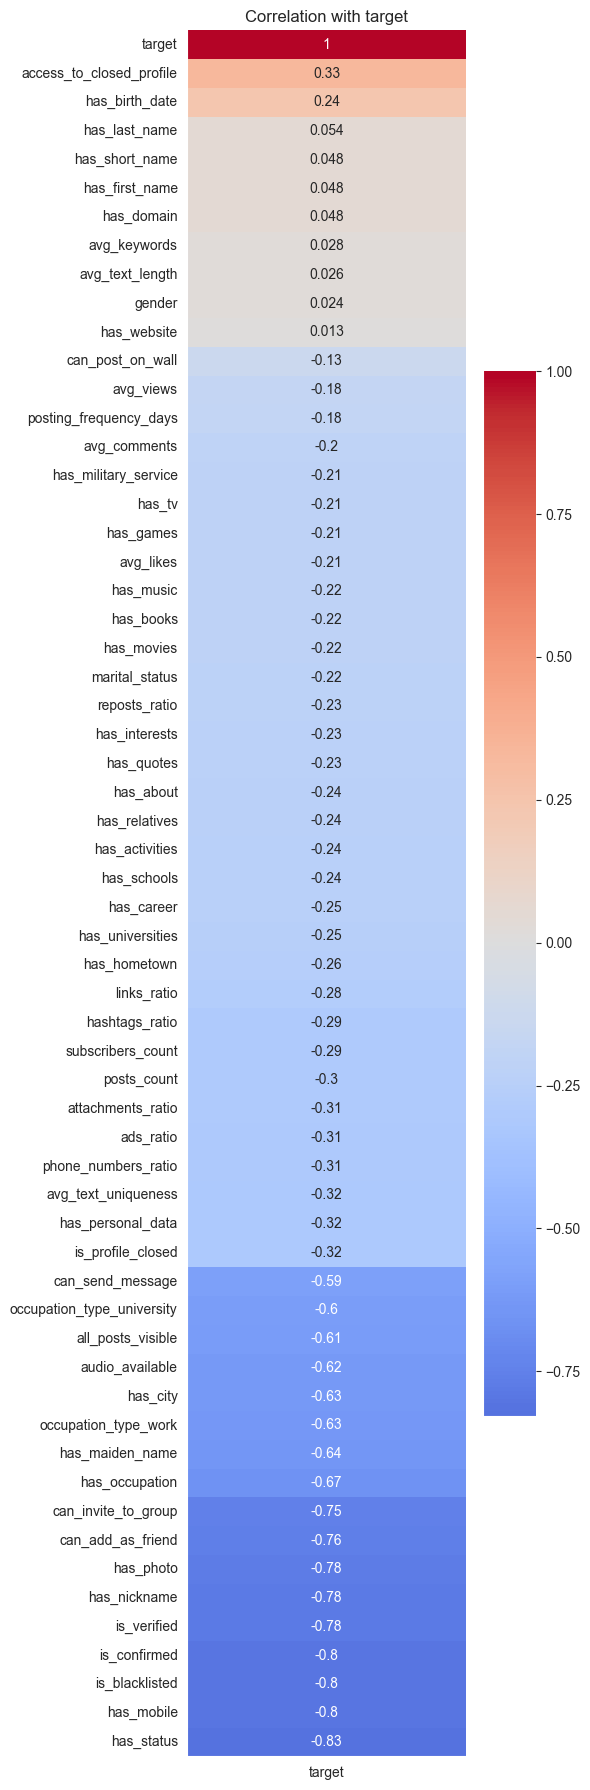

In [27]:
target_corr = correlation[['target']].sort_values(by='target', ascending=False)

plt.figure(figsize=(6, len(target_corr) * 0.3))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.title("Correlation with target")
plt.tight_layout()

Przygotowanie danych do modelu

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

Skalowanie danych

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Stworzenie modelów

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=420)
gb_model = GradientBoostingClassifier(random_state=420)
lr_model = LogisticRegression(random_state=420)

rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)

rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
gb_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

Stworzenie modelu hybrydowego

In [31]:
weights = [0.4, 0.4, 0.2]
hybrid_pred_proba = (weights[0] * rf_pred_proba + 
                    weights[1] * gb_pred_proba + 
                    weights[2] * lr_pred_proba)
hybrid_pred = (hybrid_pred_proba > 0.5).astype(int)

Mierzenie skuteczności modelów

In [32]:
models = {
    'Las Losowy': rf_model.predict(X_test_scaled),
    'Gradient Boosting': gb_model.predict(X_test_scaled),
    'Regresja Logistyczna': lr_model.predict(X_test_scaled),
    'Hybryda': hybrid_pred
}

for name, predictions in models.items():
    print(f"\n{name}:")
    print(f"Dokładność: {accuracy_score(y_test, predictions):.4f}")
    print("Raport:")
    print(classification_report(y_test, predictions))


Las Losowy:
Dokładność: 0.9762
Raport:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       581
           1       0.97      0.98      0.98       594

    accuracy                           0.98      1175
   macro avg       0.98      0.98      0.98      1175
weighted avg       0.98      0.98      0.98      1175


Gradient Boosting:
Dokładność: 0.9728
Raport:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       581
           1       0.97      0.98      0.97       594

    accuracy                           0.97      1175
   macro avg       0.97      0.97      0.97      1175
weighted avg       0.97      0.97      0.97      1175


Regresja Logistyczna:
Dokładność: 0.9711
Raport:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       581
           1       0.96      0.98      0.97       594

    accuracy                           0.97  